# EDA

### import all the neccessary libreries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import warnings

%matplotlib inline 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

sns.set_style('darkgrid')

plt.rcParams["figure.figsize"] = (10, 6)


### load the data into the dataframe.

In [3]:
matches = pd.read_csv('matches.csv',header=0,index_col=0)
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham,2.2,0.5,75.0,62443.0,İlkay Gündoğan,4-3-3,Michael Oliver,Match Report,NaN,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,1.7,0.1,67.0,53453.0,İlkay Gündoğan,4-2-3-1,David Coote,Match Report,NaN,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle Utd,2.1,1.8,69.0,52258.0,İlkay Gündoğan,4-3-3,Jarred Gillett,Match Report,NaN,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,2.2,0.1,74.0,53112.0,Kevin De Bruyne,4-2-3-1,Darren England,Match Report,NaN,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,3.3,0.7,74.0,53409.0,İlkay Gündoğan,4-2-3-1,Paul Tierney,Match Report,NaN,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City


## basic EDA 

1. To check the shape of the dataset

In [4]:
print(matches.shape)
print(f'there are {matches.shape[0]} instances and {matches.shape[1]} features in the dataset.')

(3800, 27)
there are 3800 instances and 27 features in the dataset.


2. To check basic information about the dataset.

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3800 entries, 1 to 39
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3800 non-null   object 
 1   time          3800 non-null   object 
 2   comp          3800 non-null   object 
 3   round         3800 non-null   object 
 4   day           3800 non-null   object 
 5   venue         3800 non-null   object 
 6   result        3800 non-null   object 
 7   gf            3800 non-null   float64
 8   ga            3800 non-null   float64
 9   opponent      3800 non-null   object 
 10  xg            3800 non-null   float64
 11  xga           3800 non-null   float64
 12  poss          3800 non-null   float64
 13  attendance    2912 non-null   float64
 14  captain       3800 non-null   object 
 15  formation     3800 non-null   object 
 16  referee       3800 non-null   object 
 17  match report  3800 non-null   object 
 18  notes         0 non-null      

there are null values in some of the columns. 

features of dataset are of different datatypes.

datype of 'date' feaeure is 'object here. we will convert it to datetime datatype to get neccessary information.

3. To get the dataypes information of the dataset. 

In [6]:
matches.dtypes.value_counts()


object     13
float64    13
int64       1
dtype: int64

there are 13 features with 'object' dataype. 13 features wih 'float' datatype and 1 feature with 'int' datatype.

4. To get all the features name of the dataset.

In [7]:
matches.columns.values

array(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf',
       'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot',
       'dist', 'fk', 'pk', 'pkatt', 'season', 'team'], dtype=object)

5. To get the statistical information about the dataset.

In [8]:
matches.describe().T

,count,mean,std,min,25%,50%,75%,max
gf,3800.0,1.390789,1.279835,0.0,0.00,1.0,2.00,9.0
ga,3800.0,1.390789,1.279835,0.0,0.00,1.0,2.00,9.0
xg,3800.0,1.354132,0.801705,0.0,0.70,1.2,1.80,5.9
xga,3800.0,1.354132,0.801705,0.0,0.70,1.2,1.80,5.9
poss,3800.0,50.001053,12.699412,18.0,40.00,50.0,60.00,82.0
attendance,2912.0,38578.299451,16774.206248,2000.0,26744.75,32389.5,53177.25,81332.0
notes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sh,3800.0,12.383947,5.416499,0.0,8.00,12.0,16.00,36.0
sot,3800.0,4.125789,2.417029,0.0,2.00,4.0,6.00,15.0
dist,3798.0,17.484518,3.021095,5.3,15.50,17.4,19.20,35.0


In [9]:
matches.describe(include='object').T

,count,unique,top,freq
date,3800,598,2023-05-28,20
time,3800,21,15:00,1160
comp,3800,1,Premier League,3800
round,3800,38,Matchweek 1,100
day,3800,7,Sat,1740
venue,3800,2,Away,1900
result,3800,3,W,1479
opponent,3800,27,West Ham,190
captain,3800,174,Lewis Dunk,156
formation,3800,21,4-2-3-1,946


there is only one value present in features 'comp' and ' match report' . we will drop them as they are insignificant in model building proccess.

there are 27 unique teams in the dataset despite being only 20 teams can participate in a season.this is due the fact that bootom 3 teams of each season gets relegated to the lower division competition in the following season and top 3 teams of lower division gets promoted to the EPL following season.

5. To check the count of null values .

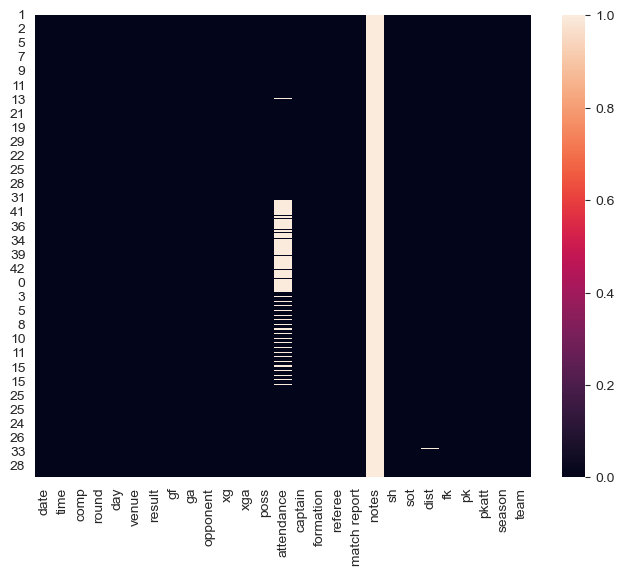

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(data = matches.isnull())
plt.show()

In [11]:
temp=pd.DataFrame(matches.isnull().sum()[matches.isnull().sum()>0])
temp.reset_index(drop=False,inplace=True)
temp.columns =['features','null values']

temp['%null values'] = np.round(temp['null values']/len(matches)*100,4)
temp

,features,null values,%null values
0,attendance,888,23.3684
1,notes,3800,100.0000
2,dist,2,0.0526


there are 3 features 'attendance' , 'notes' and 'dist' in the dataset with the null values . in feature 'notes' there are 100% null values .thats whay we are going to drop the feature . meanwhile we will try to fill the null values in other columns accordingly.

6. correlation analysis

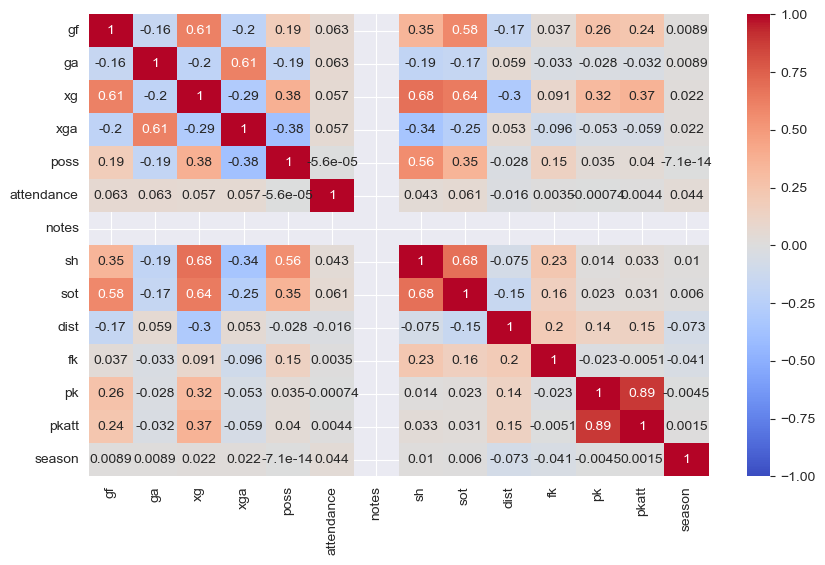

In [12]:
cor = matches.corr()
sns.heatmap(data = cor ,vmax=1 ,vmin= -1 , annot=True, cmap='coolwarm' )
plt.show()


there is a high positive correlation between fetures 'pk' and 'pkatt'. wo we will drop one of them in model building proccess.

there are also moderately correleted fetures like ('sh' and 'sot') ,('xg'and 'sh). so if needed we can drop 'sh' feture in future. 

7. Drop the insignificant features.

In [13]:
matches.drop(columns=['notes','comp','match report'],inplace=True)
matches.shape

(3800, 24)

we dropped fetures 'notes' ,'comp' and 'match report' as the are insignificunt to the furthere proccess in model building or EDA.m

8. To check if there are any logical outliers.

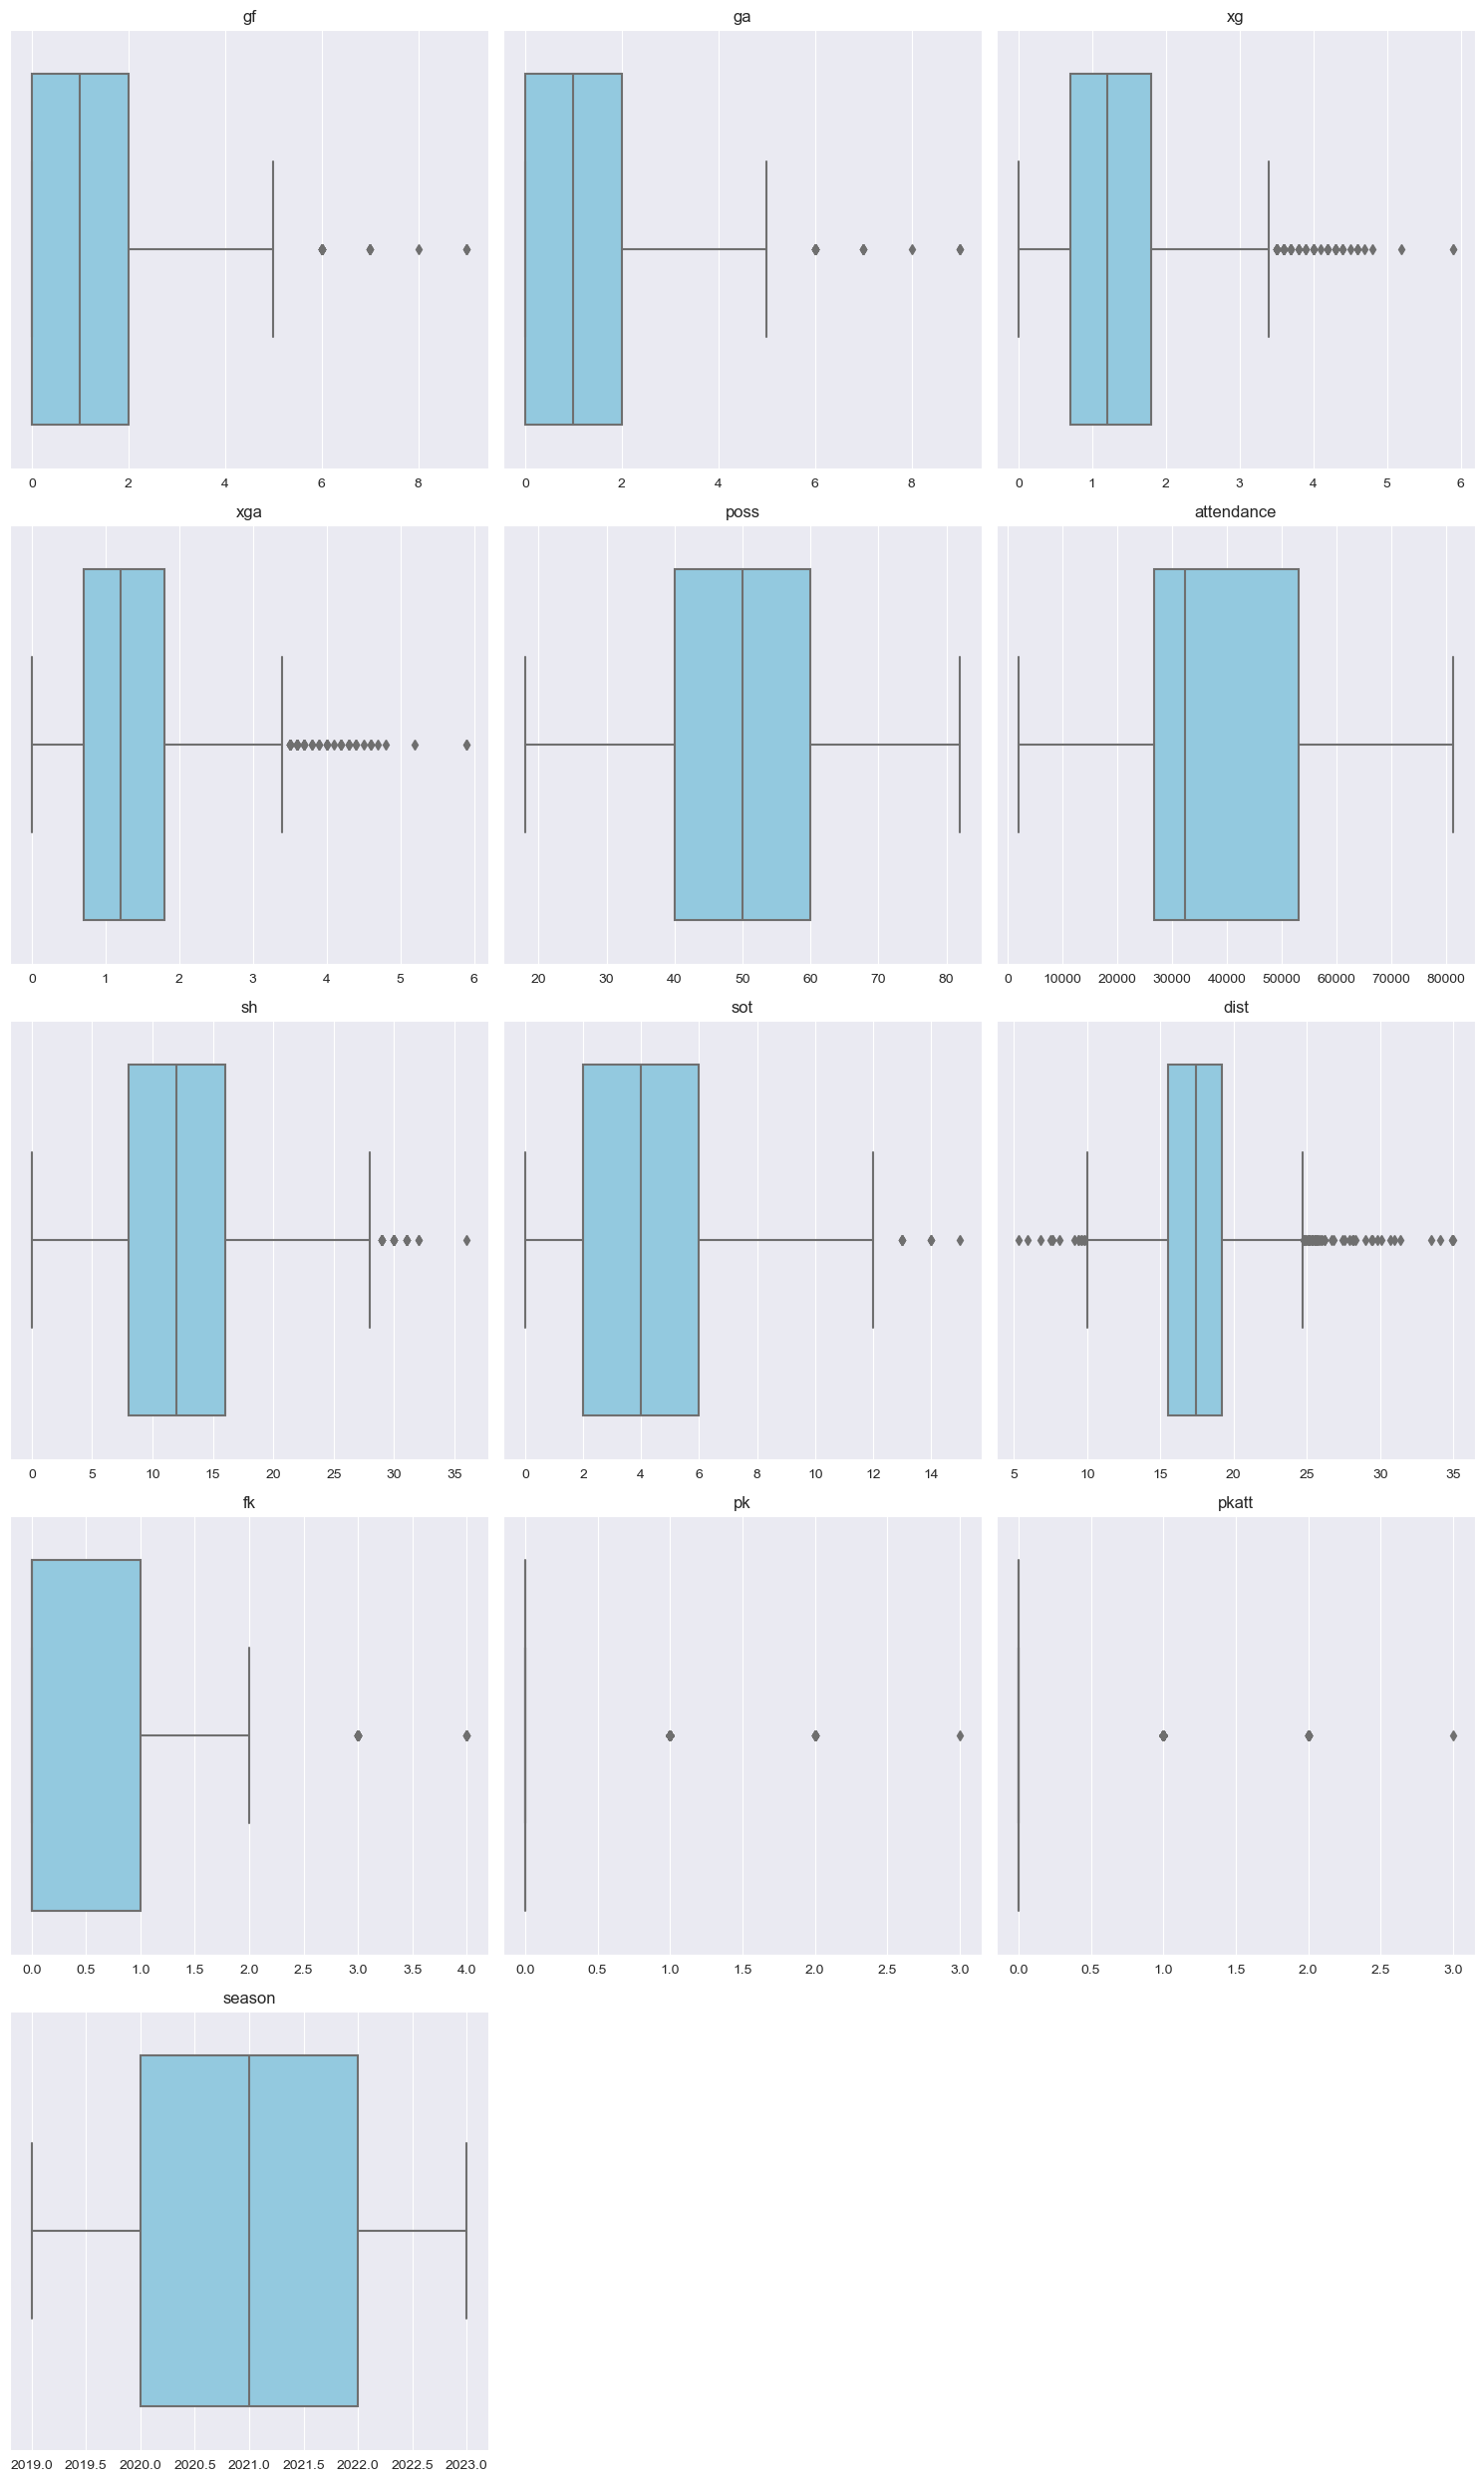

In [14]:
num_col = [col for col in matches.columns if matches[col].dtype != 'object']

# Determine the number of columns in the DataFrame
num_columns = len(num_col)

# Calculate the number of rows required for subplots
num_rows = (num_columns + 2) // 3  # Add 2 to handle uneven number of columns

# Set up the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

# Flatten the axes array
axes = axes.flatten()

# Plot boxplots for each column
for i, column in enumerate(num_col):
    sns.boxplot(ax=axes[i], data=matches, x = column, color='skyblue')
    axes[i].set_title(column)
    axes[i].set_xlabel('')

# Remove empty subplots if present
if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


there are no logical outliers in the data .

9. Deal with the null values 

In [15]:
for col in ['attendance','dist']:
    matches[col].fillna(value=matches[col].mean() , inplace=True)
    
matches.isnull().sum().sum()

0

10. Feature engineering

In [16]:
matches['date'] =pd.to_datetime(matches['date'])
matches['date'].dtype

dtype('<M8[ns]')

convert the date column to datetime datatype.

In [17]:
# Extract month and year components
matches['month'] = matches['date'].dt.month
matches['year'] = matches['date'].dt.year

matches.drop('date',axis =1 , inplace =True)
matches.shape

(3800, 25)

extract month and year components from 'date' column

11. univariate anlysis

In [18]:
for i in [ 'pk' , 'fk']:
    print(f'{i}\t% of data')
    print(np.round(matches[i].value_counts()/len(matches)*100,2))
    print()

pk	% of data
0.0    89.55
1.0     9.97
2.0     0.45
3.0     0.03
Name: pk, dtype: float64

fk	% of data
0.0    63.26
1.0    29.08
2.0     6.66
3.0     0.84
4.0     0.16
Name: fk, dtype: float64



we can drop the 'pk' column for model buildins because highly dominace of 1 category . and we can also drop 'fk' with the help of domain knowledge and also moderate dominance of category.

In [19]:
for i in ['referee' , 'formation'] :
    print(i)
    print(f'number of unique values : {matches[i].nunique()}')
    print()

referee
number of unique values : 31

formation
number of unique values : 21



reletive to the data we have ,the number of categories in features 'referee' and 'formation' may  worsen the predictive model. so if needed we can
drop them in the proccess of tunnin the model.

In [20]:
matches['team'].value_counts()

Manchester City             190
Crystal Palace              190
Southampton                 190
Leicester City              190
Everton                     190
Arsenal                     190
Wolverhampton Wanderers     190
Chelsea                     190
West Ham United             190
Manchester United           190
Tottenham Hotspur           190
Brighton and Hove Albion    190
Liverpool                   190
Newcastle United            190
Aston Villa                 152
Burnley                     152
Fulham                      114
Watford                     114
Leeds United                114
Bournemouth                 114
Brentford                    76
Norwich City                 76
Sheffield United             76
Nottingham Forest            38
West Bromwich Albion         38
Cardiff City                 38
Huddersfield Town            38
Name: team, dtype: int64

we can clearly see that 7 teams of 27 have only played one or two seasons out of 5 in epl. we can drop the teams who played only sesason in epl..  

In [21]:
matches['opponent'].value_counts()

West Ham           190
Liverpool          190
Manchester City    190
Arsenal            190
Tottenham          190
Chelsea            190
Everton            190
Leicester City     190
Brighton           190
Southampton        190
Manchester Utd     190
Wolves             190
Crystal Palace     190
Newcastle Utd      190
Burnley            152
Aston Villa        152
Fulham             114
Bournemouth        114
Leeds United       114
Watford            114
Sheffield Utd       76
Brentford           76
Norwich City        76
Nott'ham Forest     38
West Brom           38
Huddersfield        38
Cardiff City        38
Name: opponent, dtype: int64

there are several teams where team name is shortened. eg. 'manchester united' being enterd as 'manchester Utd'

In [22]:
# Get unique categories from each column
unique_categories_column1 = matches['team'].unique()
unique_categories_column2 = matches['opponent'].unique()

# Find categories that are not the same in both columns
categories_not_in_column1 = sorted(set(unique_categories_column2) - set(unique_categories_column1))
categories_not_in_column2 = sorted(set(unique_categories_column1) - set(unique_categories_column2))

print(f"there are {len(categories_not_in_column1)} teams with shortened name in 'oppenent column\n")
print('oppenent : team\n')

# Print categories that are not the same in both columns
for i,j in zip(categories_not_in_column1,categories_not_in_column2):
    print(f"{i} : {j}")


there are 10 teams with shortened name in 'oppenent column

oppenent : team

Brighton : Brighton and Hove Albion
Huddersfield : Huddersfield Town
Manchester Utd : Manchester United
Newcastle Utd : Newcastle United
Nott'ham Forest : Nottingham Forest
Sheffield Utd : Sheffield United
Tottenham : Tottenham Hotspur
West Brom : West Bromwich Albion
West Ham : West Ham United
Wolves : Wolverhampton Wanderers


we can replace and correct the name from the either of that columns 

In [23]:
temp1 = matches[matches['season']==2023]
temp2 = matches[matches['season']!=2023]


ref = sorted(set(temp2['referee'].unique()) - set(temp1['referee'].unique()))
print(ref)

formation = sorted(set(temp2['formation'].unique()) - set(temp1['formation'].unique()))
print(formation)

['Jonathan Moss', 'Kevin Friend', 'Lee Mason', 'Lee Probert', 'Martin Atkinson', 'Mike Dean', 'Oliver Langford', 'Roger East']
['4-1-3-2']


we can either remove the  refree cloumn or presesve the information of the feture we can treat them as missing values and impute them with mode value of the refree column. smae goes with formation.

In [27]:
matches['captain'].value_counts()

Lewis Dunk           156
Hugo Lloris          154
Conor Coady          152
César Azpilicueta    138
Kasper Schmeichel    126
                    ... 
Ben Foster             1
Harry Winks            1
Jack Cork              1
Chris Smalling         1
Robin Koch             1
Name: captain, Length: 174, dtype: int64

we can see the incosistancy in the 'captains' column .as there are teams with 1 captain throughout the campain where some teams keep changing captains.

## Data visualization

1 . how many no of matches played every month. in last 5 seasons ?

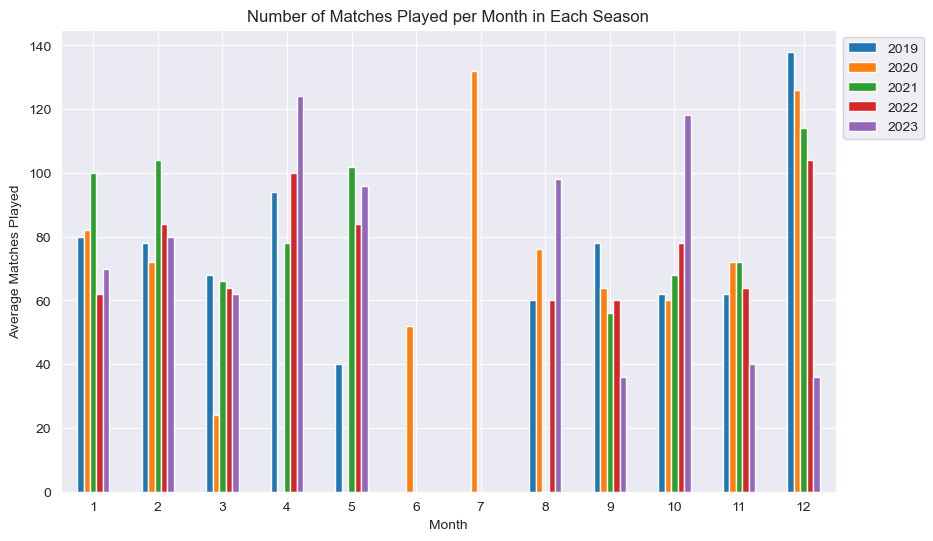

In [19]:
# Group and calculate average number of matches per season and month
season_month_avg_matches = matches.groupby(['season', 'month'])['month'].count()

# Reshape the data to have seasons as columns and months as rows
season_month_avg_matches = season_month_avg_matches.unstack('season')

# Plot the graph
season_month_avg_matches.plot(kind='bar')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Average Matches Played')
plt.title('Number of Matches Played per Month in Each Season')
plt.legend(title='Season')
plt.xticks(rotation=0)

# Adjust the legend position
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


The analysis reveals a inconsistent season schedule from August to May, with a two-month gap between seasons (june and july). However, the "CORONA" crisis in 2019 disrupted the schedule, leading to matches being played in June and July that year.

December typically sees a higher number of matches played, but in the 2022-2023 season, there was a significant decrease. This can be attributed to the World Cup being scheduled for the later part of the year, resulting in a shift in match distribution and reduced activity during December.

The impact of the COVID-19 pandemic is evident in the imbalanced number of matches played during the 2019-2020 and 2020-2021 seasons. Additionally, the schedule variability across seasons, influenced by factors like international breaks and major activities in England, highlights the dynamic nature of match scheduling and the need for adaptability in response to external factors.


In [20]:
#season_month_avg_matches   # to get th numbers in group by table of season and month


2. which top 4 teams  and bottom 3 teams with most number of goals and least number of goals scored in each of last five season ?

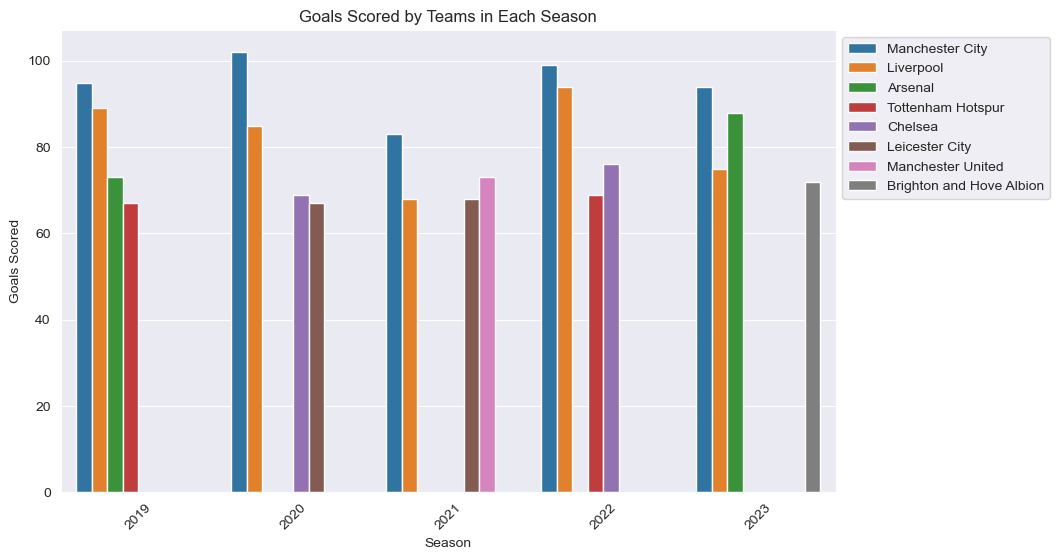

In [21]:
# Group and calculate total goals scored per team in each season
season_team_goals = matches.groupby(['season', 'team'])['gf'].sum()

# Reset the index to make 'season' and 'team' regular columns
season_team_goals = season_team_goals.reset_index()

# Get the top 4 teams with the most goals scored in each season
top4_teams_per_season = season_team_goals.groupby('season').apply(lambda x: x.nlargest(4, 'gf')).reset_index(drop=True)

# Plot the bar chart
ax = sns.barplot(data=top4_teams_per_season, x='season', y='gf', hue='team')

# Set x-axis label and tick labels
plt.xlabel('Season')
plt.xticks(rotation=45)

# Set y-axis label
plt.ylabel('Goals Scored')

# Set the plot title
plt.title('Goals Scored by Teams in Each Season')

# Adjust the legend position
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


In [22]:
#top4_teams_per_season  #to get the numerical data

1.Manchester City has been consistently strong in terms of goal-scoring across multiple seasons, with their highest goal tally of 102 in the 2020 season.

2.Liverpool has also been a strong contender in terms of goals, consistently scoring above 85 goals in each season, and reaching a peak of 94 goals in the 2022 season.

3.Arsenal and Tottenham Hotspur have relatively lower goal counts compared to Manchester City and Liverpool, with their highest goal tallies being 73 and 69 goals respectively.

4.Brighton and Hove Albion, although not among the highest-scoring teams, managed to score a respectable 72 goals in the 2023 season.


The data suggests that Manchester City, Liverpool, Arsenal, and Chelsea have been the standout teams in terms of goal-scoring over the analyzed seasons, consistently ranking among the top goal-scoring teams.

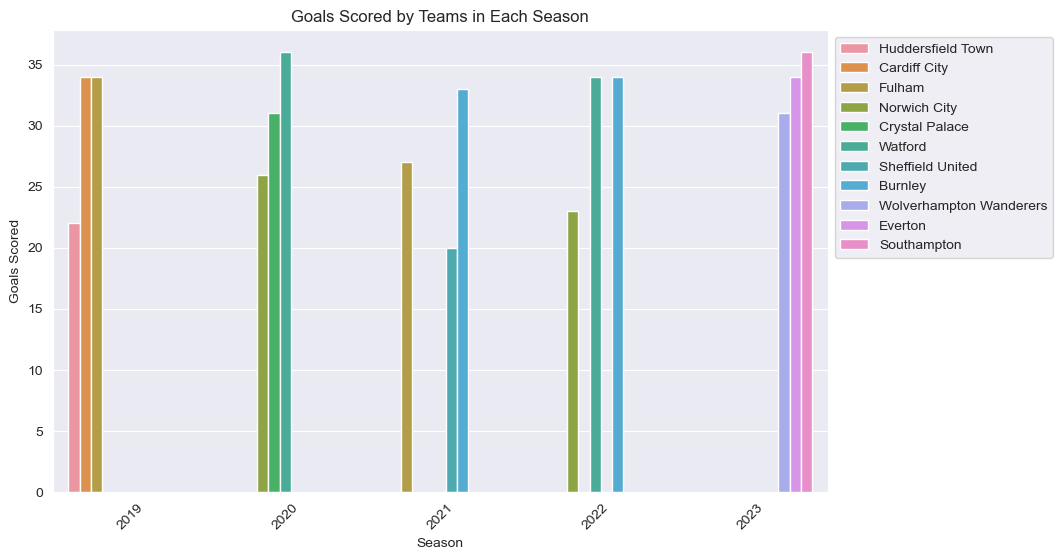

In [23]:


# Get the bottom 3 teams with the least goals scored in each season
bottom3_teams_per_season = season_team_goals.groupby('season').apply(lambda x: x.nsmallest(3, 'gf')).reset_index(drop=True)

# Plot the bar chart
ax = sns.barplot(data=bottom3_teams_per_season, x='season', y='gf', hue='team')

# Set x-axis label and tick labels
plt.xlabel('Season')
plt.xticks(rotation=45)

# Set y-axis label
plt.ylabel('Goals Scored')

# Set the plot title
plt.title('Goals Scored by Teams in Each Season')

# Adjust the legend position
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


1.Huddersfield Town, Cardiff City, and Fulham were the lowest-scoring teams in the 2019 season, indicating their struggles to find the back of the net and potentially contributing to their lower league positions.

2.Norwich City, Crystal Palace, and Watford recorded relatively low goal counts in the 2020 season, suggesting their challenges in converting scoring opportunities and potentially impacting their overall performance.

3.Sheffield United, Fulham, and Burnley had lower goal counts in the 2021 season, indicating their difficulties in generating consistent goal-scoring opportunities and potentially contributing to their lower league positions.

4.Wolverhampton Wanderers, Everton, and Southampton recorded moderate goal counts in the 2023 season, suggesting their ability to find the back of the net but not ranking among the top goal-scoring teams.

In [24]:
#bottom3_teams_per_season  #to get the numerical data

3. top 10 teams with most win percentage and top 10 teams with most loss percentage accross all 5 seasons ?

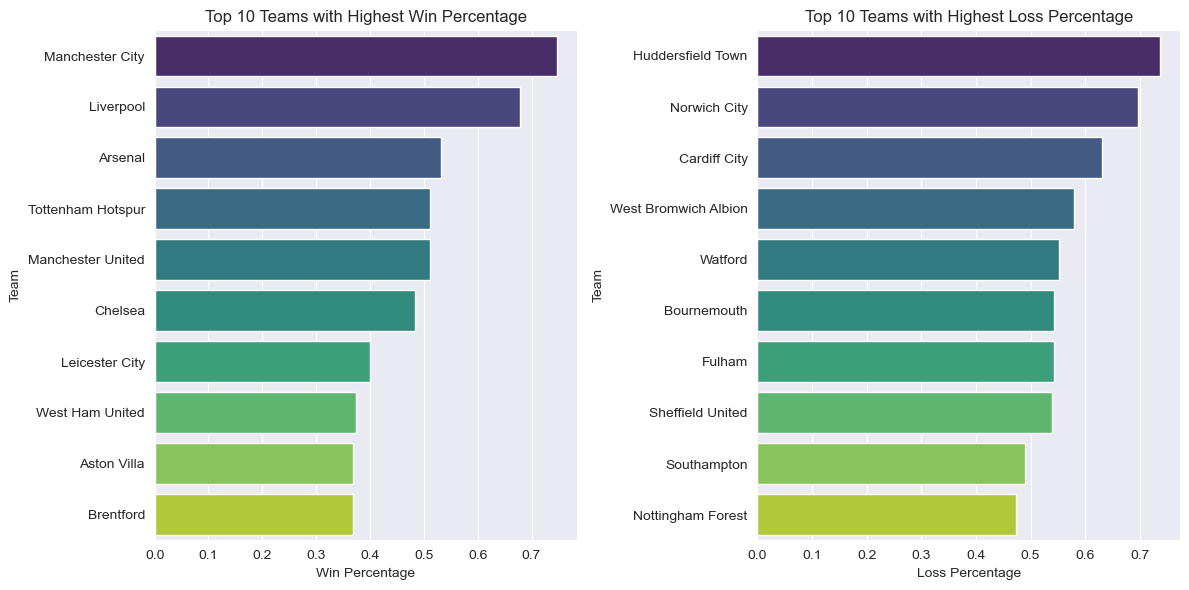

In [25]:

# Calculate win percentage for each team
win_percentages = matches[matches['result'] == 'W'].groupby('team')['result'].count() / matches.groupby('team')['result'].count()
win_percentages = win_percentages.sort_values(ascending=False).head(10)

# Calculate loss percentage for each team
loss_percentages = matches[matches['result'] == 'L'].groupby('team')['result'].count() / matches.groupby('team')['result'].count()
loss_percentages = loss_percentages.sort_values(ascending=False).head(10)

# Create a new DataFrame for plotting win percentages
top_10_win_teams = pd.DataFrame({'Team': win_percentages.index, 'Win Percentage': win_percentages.values})

# Create a new DataFrame for plotting loss percentages
top_10_loss_teams = pd.DataFrame({'Team': loss_percentages.index, 'Loss Percentage': loss_percentages.values})

# Set up the subplot grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the bar graph for win percentages
sns.barplot(ax=axes[0], x='Win Percentage', y='Team', data=top_10_win_teams, palette='viridis')
axes[0].set_title('Top 10 Teams with Highest Win Percentage')
axes[0].set_xlabel('Win Percentage')
axes[0].set_ylabel('Team')

# Plot the bar graph for loss percentages
sns.barplot(ax=axes[1], x='Loss Percentage', y='Team', data=top_10_loss_teams, palette='viridis')
axes[1].set_title('Top 10 Teams with Highest Loss Percentage')
axes[1].set_xlabel('Loss Percentage')
axes[1].set_ylabel('Team')

plt.tight_layout()
plt.show()


Manchester City and liverpool has more than 65 % win percentage which is way more than compared to rest of the team is EPL.

Hudderstfield Town , Norwich City and Cardif city are the teams having more than 60 % loss percntage.

4. how does possesion affect the Goals scored and Goals concceded?

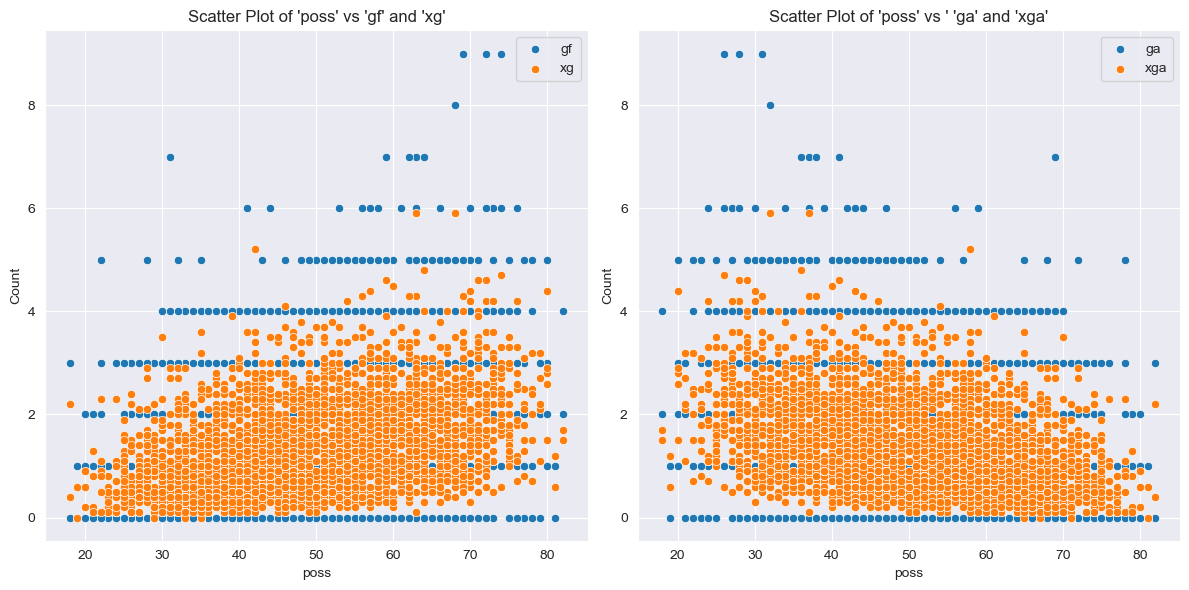

In [26]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot for 'gf' and 'xg'
sns.scatterplot(x='poss', y='gf', data=matches, ax=axes[0], label='gf')
sns.scatterplot(x='poss', y='xg', data=matches, ax=axes[0], label='xg')

# Set title and labels for the first subplot
axes[0].set_title("Scatter Plot of 'poss' vs 'gf' and 'xg'")
axes[0].set_xlabel('poss')
axes[0].set_ylabel('Count')

# Scatter plot for 'ga' and 'xga'
sns.scatterplot(x='poss', y='ga', data=matches, ax=axes[1], label='ga')
sns.scatterplot(x='poss', y='xga', data=matches, ax=axes[1], label='xga')

# Set title and labels for the second subplot
axes[1].set_title("Scatter Plot of 'poss' vs ' 'ga' and 'xga'")
axes[1].set_xlabel('poss')
axes[1].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()


even the football is game of uncertainity .we can see that as team having more of the possession have higher 'expected goals' and lesser 'ex[ected goals against'.

we can not say anything about 'goals scored' from 'possesion' of the ball. but more of the times teams with higher number of goals have more possession,not always the case.

In [27]:
#matches[(matches['gf']>6) & (matches['poss']<40)]

5.which teams covers more distance on the ground w.r.t teams having more possession or less possession of the ball? how does it affect on result?

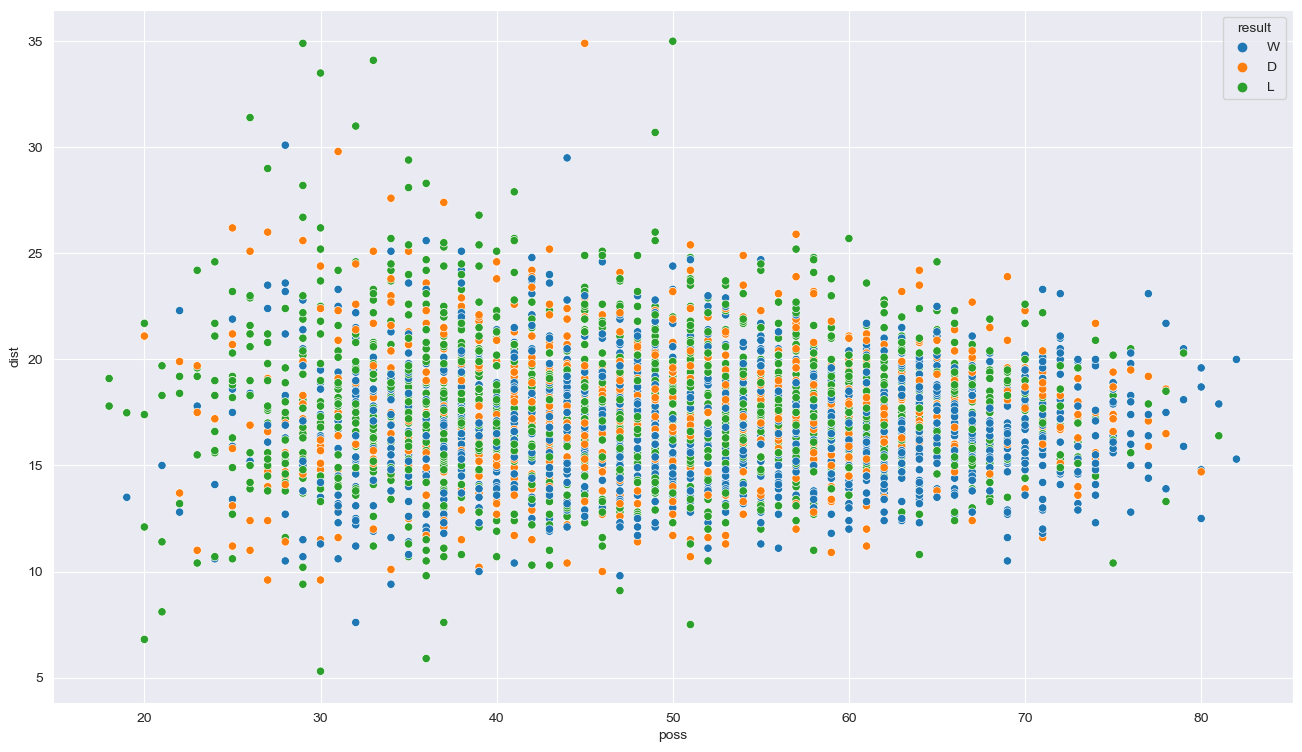

In [28]:
plt.figure(figsize=(16,9))
sns.scatterplot(data = matches , x ='poss', y ='dist', hue = 'result')
plt.show()

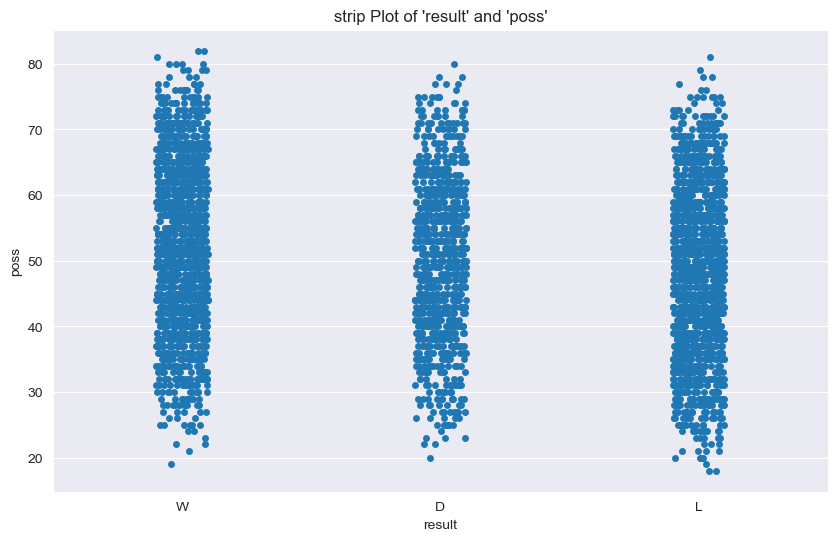

In [29]:
sns.stripplot(x='result', y='poss', data=matches)
plt.title("strip Plot of 'result' and 'poss'")
plt.show()

we can say that teams with lower ball possesion covers more distance on a ground than te
ams with higeer ball possesion. 

 if a team having ball possesion more than 75 or 80 percent then we can say that chances of team win or draw the match is slightly more than lossing .
 
 but we can not predict the result of team with possesion in the range 30 to 75 %.

6. how shots taken or shots on target affect the result?

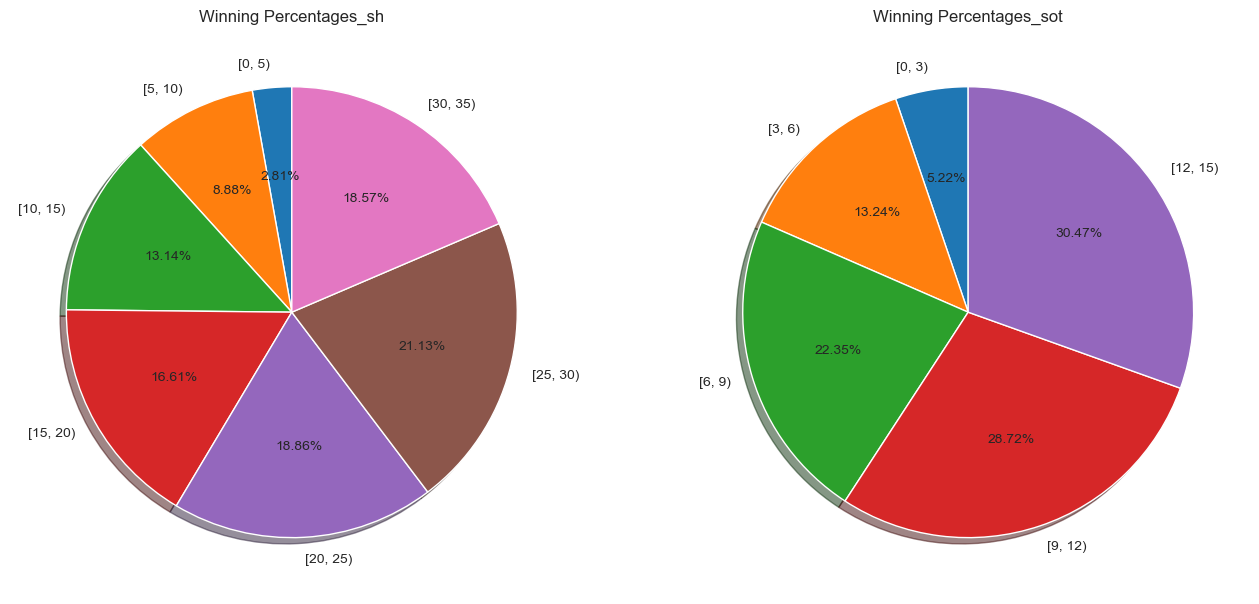

In [30]:
temp = matches[['sh','sot','result']]

# Create a new column to represent the range of 'so' values
temp['sh_range'] = pd.cut(temp['sh'], bins=range(0, 40, 5), right=False)

# Calculate winning percentages for each range
winning_percentages_sh = temp.groupby('sh_range')['result'].apply(lambda x: (x == 'W').sum() / len(x))

# Create a new column to represent the range of 'so' values
temp['sot_range'] = pd.cut(temp['sot'], bins=range(0, 16, 3), right=False)

# Calculate winning percentages for each range
winning_percentages_sot = temp.groupby('sot_range')['result'].apply(lambda x: (x == 'W').sum() / len(x))

# Create a pie chart of winning percentages

fig = plt.subplots(1,2,figsize=(16, 9))

plt.subplot(1,2,1)
plt.pie(winning_percentages_sh, labels=winning_percentages_sh.index, autopct='%1.2f%%',shadow=True,startangle=90)
plt.title('Winning Percentages_sh')

plt.subplot(1,2,2)
plt.pie(winning_percentages_sot, labels=winning_percentages_sot.index, autopct='%1.2f%%',shadow=True,startangle=90)
plt.title('Winning Percentages_sot')

# Display the pie chart
plt.show()


we can say that shot taken and shots on target are correlated to result. as shots or shots on target increases the percentage of winning alsp increases.

7. How does  expected goal ('xga') and expected goal against ('xga') impact the result?

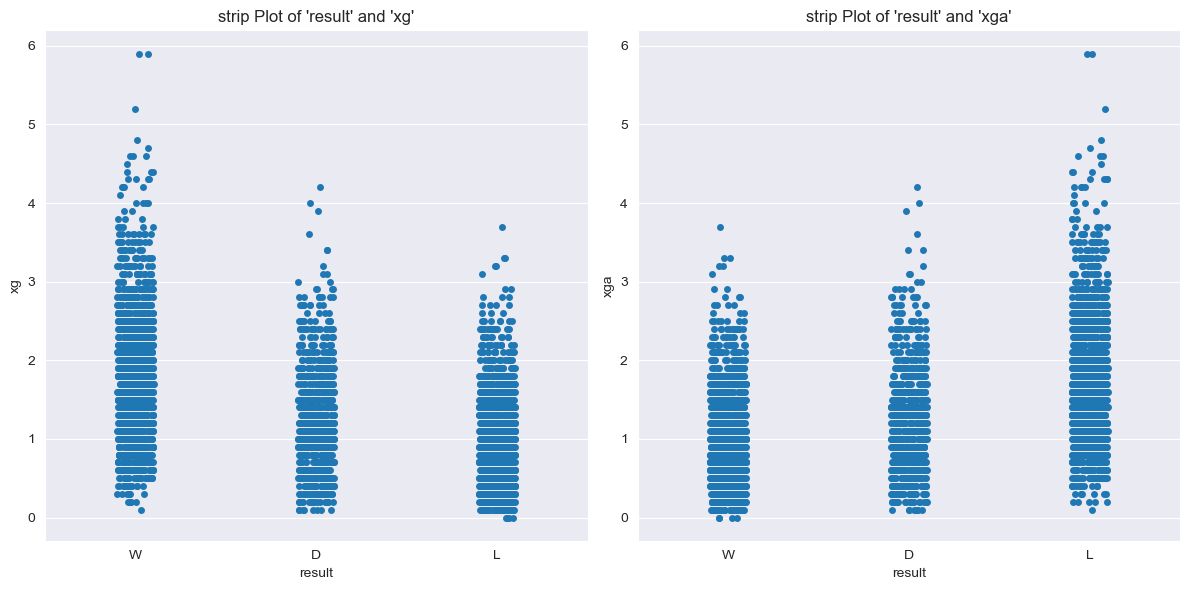

In [31]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot for 'gf' and 'xg'
sns.stripplot(x='result', y='xg', data=matches, ax=axes[0])


# Set title and labels for the first subplot
axes[0].set_title("strip Plot of 'result' and 'xg'")
axes[0].set_xlabel('result')
axes[0].set_ylabel('xg')

# Scatter plot for 'ga' and 'xga'
sns.stripplot(x='result', y='xga', data=matches, ax=axes[1])


# Set title and labels for the second subplot
axes[1].set_title("strip Plot of 'result' and 'xga'")
axes[1].set_xlabel('result')
axes[1].set_ylabel('xga')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()


if xg >3 there there is very high chance that team is going to win the match , if xga >3 there is a very high chance that team is going to loose the match.

if 0< xg /xga >3 we can not conclude the resut .result can be anything Win,Draw or Loss.

8. How does goals forword ('gf') and goal against ('ga') impact the result?

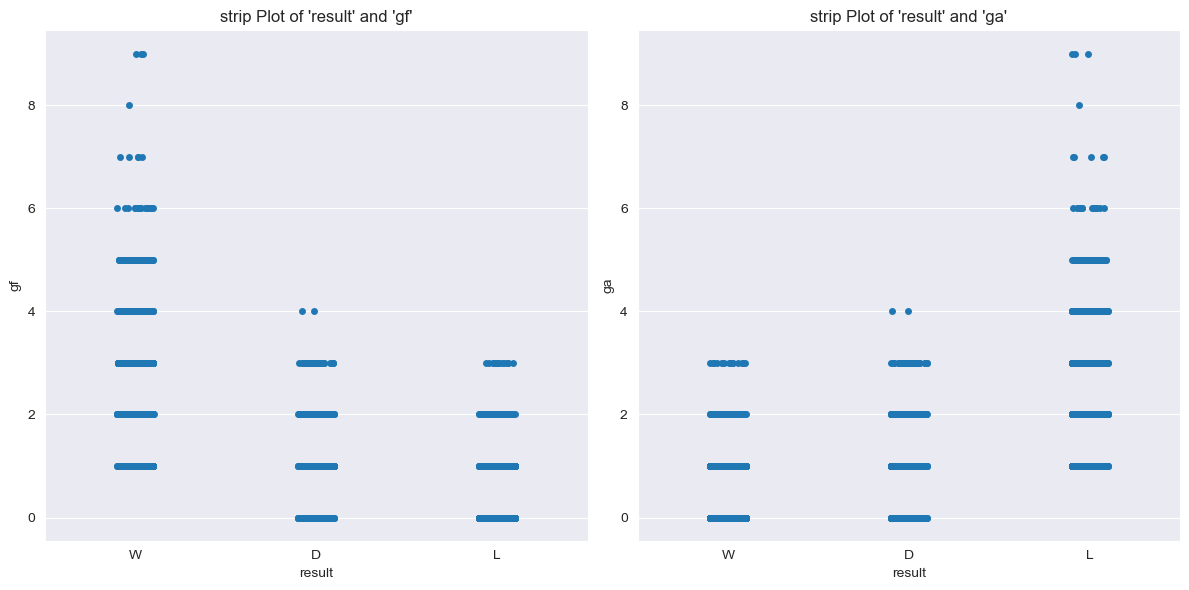

In [32]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.stripplot(x='result', y='gf', data=matches, ax=axes[0])


# Set title and labels for the first subplot
axes[0].set_title("strip Plot of 'result' and 'gf'")
axes[0].set_xlabel('result')
axes[0].set_ylabel('gf')


sns.stripplot(x='result', y='ga', data=matches, ax=axes[1])


# Set title and labels for the second subplot
axes[1].set_title("strip Plot of 'result' and 'ga'")
axes[1].set_xlabel('result')
axes[1].set_ylabel('ga')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()


it is very unlikely if team lose or draw the match after scoring 4 or more goals . 

we cannnot conclude the result if the the goals forword is  or less . team can either win ,losse or draw the match.

9. does attendance of supporters affect the result in major way ? can Home venue gives advantage to the team playing in home.?

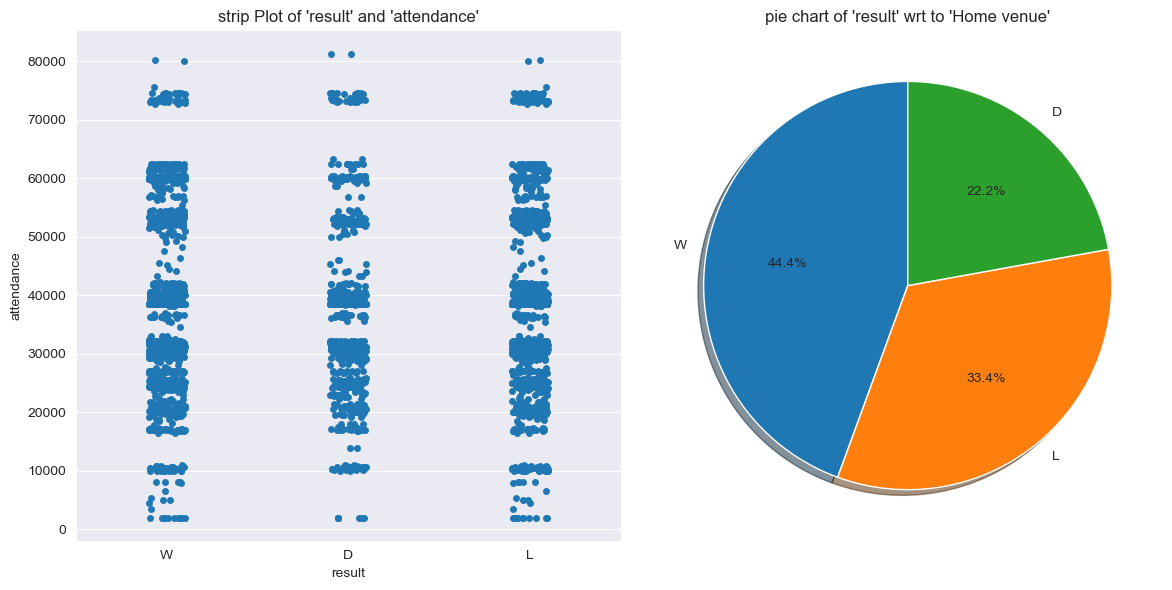

In [33]:
# Filter the DataFrame for 'home' venue
home_df = matches[matches['venue'] == 'Home']
home_result_counts = home_df['result'].value_counts()


# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot for 'gf' and 'xg'
sns.stripplot(x='result', y='attendance', data=matches, ax=axes[0])


# Set title and labels for the first subplot
axes[0].set_title("strip Plot of 'result' and 'attendance'")
axes[0].set_xlabel('result')
axes[0].set_ylabel('attendance')

# Scatter plot for 'ga' and 'xga'
plt.pie(home_result_counts, labels=home_result_counts.index, autopct='%1.1f%%',shadow=True,startangle=90)


# Set title and labels for the second subplot
axes[1].set_title("pie chart of 'result' wrt to 'Home venue'")


# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()


in genreal we know that more the attendance of supporters the more pressure opposite team feels , and can affect the result . but from the above plot we can say that attendance affect to the result is negligible.

but there is clear Home venue advntage to the team. we can say that team with Home venue have 10 percent more chances winnig than away team.

10. top 5 most used formation in epl ? what are the wining percentage of each formation ?

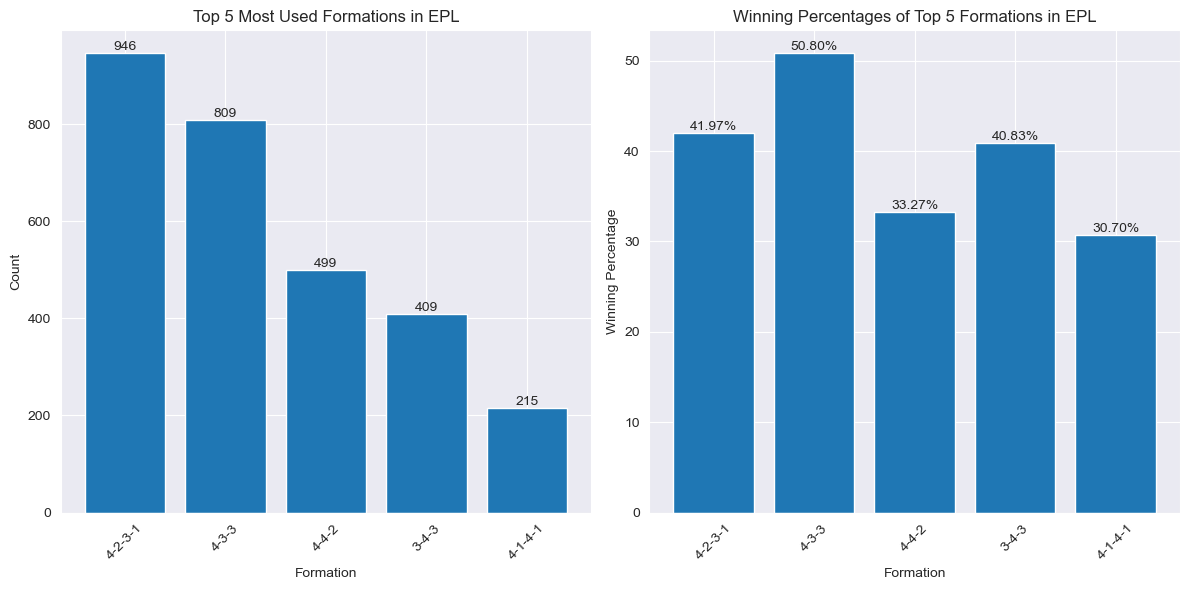

In [42]:
# Group by formation and count the occurrences
formation_counts = matches['formation'].value_counts()

# Select the top 5 most used formations
top_formations = formation_counts.head(5)

# Calculate the winning percentage for each formation
winning_percentages = []
for formation in top_formations.index:
    formation_matches = matches[matches['formation'] == formation]
    wins = formation_matches[formation_matches['result'] == 'W'].shape[0]
    total_matches = formation_matches.shape[0]
    winning_percentage = (wins / total_matches) * 100
    winning_percentages.append(winning_percentage)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot first subplot
axs[0].bar(top_formations.index, top_formations.values)
axs[0].set_xlabel('Formation')
axs[0].set_ylabel('Count')
axs[0].set_title('Top 5 Most Used Formations in EPL')

# Add value labels to the first subplot
for i, v in enumerate(top_formations.values):
    axs[0].text(i, v, str(v), ha='center', va='bottom')

# Plot second subplot
axs[1].bar(top_formations.index, winning_percentages)
axs[1].set_xlabel('Formation')
axs[1].set_ylabel('Winning Percentage')
axs[1].set_title('Winning Percentages of Top 5 Formations in EPL')

# Add value labels to the second subplot
for i, v in enumerate(winning_percentages):
    axs[1].text(i, v, f"{v:.2f}%", ha='center', va='bottom')

# Rotate x-axis labels
for ax in axs:
    ax.tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


'4-3-3' can be considerd as the best used formation in the league followed by '4-2-3-1' and '3-4-3'.